# Test LMB labels are correctly encoded
in image generation pipeline

In [20]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import unet.pipeline_utilities as pu
from nilearn import surface, plotting

# start = int(sys.argv[1])
# end = int(sys.argv[2])
start, end = 0, 1  # change values during testing
data_dir = '/oak/stanford/groups/jyeatman/LMB_Stanford/LMB_BIDS/derivatives/freesurfer'
label_subdir = 'label'
surf_subdir = 'surf'

subjects = [s for s in os.listdir(data_dir) if 'sub' in s]
jewelia_labeled_subjects = ['sub-107', 'sub-108', 'sub-1210', 'sub-1211', 'sub-1215', 
                            'sub-1234', 'sub-1335', 'sub-1339', 'sub-1380', 'sub-1395', 
                            'sub-1444', 'sub-1452', 'sub-1453', 'sub-1468', 'sub-173', 
                            'sub-230', 'sub-309', 'sub-984']
subjects = [s for s in subjects if s in jewelia_labeled_subjects]
subjects.sort()

In [2]:
sub_dfs = []

for sub in subjects:

    curv_file = os.path.join(data_dir, sub, surf_subdir, 'lh.curv')
    sulc_file = os.path.join(data_dir, sub, surf_subdir, 'lh.sulc')
    infl_file = os.path.join(data_dir, sub, surf_subdir, 'lh.inflated')
    label_dir = os.path.join(data_dir, sub, label_subdir)
    label_files = [f for f in os.listdir(label_dir) if ('.label' in f) and ('lh.' in f)]

    surf = surface.load_surf_mesh(infl_file)
    curv = surface.load_surf_data(curv_file)
    sulc = surface.load_surf_data(sulc_file)

    labels = []
    for l in label_files:
        labels.append(surface.load_surf_data(os.path.join(label_dir, l)))

    sub_df = pd.DataFrame(
        {
            'Subject': sub,
            'Filename': label_files,
            'Label': labels,
            'Mesh': [surf] * len(labels),
            'Curv': [curv] * len(labels),
            'Sulc': [sulc] * len(labels)
        }
    )
    sub_dfs.append(sub_df)

df = pd.concat(sub_dfs)

In [7]:
df[df['Subject']=='sub-1468']

,Subject,Filename,Label,Mesh,Curv,Sulc
0,sub-1468,lh.entorhinal_exvivo.label,"[58397, 59527, 59541, 58414, 60741, 59554, 583...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
1,sub-1468,lh.perirhinal_exvivo.label,"[53607, 53659, 53638, 54782, 54805, 54806, 548...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
2,sub-1468,lh.BA1_exvivo.label,"[54930, 53744, 56103, 54934, 53745, 53751, 561...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
3,sub-1468,lh.BA4a_exvivo.label,"[60796, 60790, 59622, 61872, 60799, 59641, 596...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
4,sub-1468,lh.V1_exvivo.label,"[69, 70, 68, 80, 81, 9, 12, 99, 195, 16, 106, ...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
5,sub-1468,lh.BA3a_exvivo.label,"[59583, 59584, 59585, 59594, 59595, 58484, 573...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
6,sub-1468,lh.BA45_exvivo.thresh.label,"[101008, 109804, 107737, 110360, 110445, 11215...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
7,sub-1468,lh.BA45_exvivo.label,"[98473, 99097, 99743, 99131, 99146, 99174, 991...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
8,sub-1468,lh.BA3b_exvivo.label,"[53742, 53737, 54927, 56094, 57274, 58447, 572...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."
9,sub-1468,lh.entorhinal_exvivo.thresh.label,"[63990, 61841, 61855, 58415, 76184, 72960, 685...","([[22.866409301757812, -127.75926971435547, -7...","[-0.15655173, -0.16211441, -0.19182332, -0.200...","[-7.5262976, -7.4047976, -7.4124193, -7.279773..."


In [8]:
all_label_files = list(df['Filename'].unique())
all_labels = sorted([l.split('.')[1] for l in all_label_files if 'lh.' in l])

In [9]:
all_labels

['BA1_exvivo',
 'BA1_exvivo',
 'BA2_exvivo',
 'BA2_exvivo',
 'BA3a_exvivo',
 'BA3a_exvivo',
 'BA3b_exvivo',
 'BA3b_exvivo',
 'BA44_exvivo',
 'BA44_exvivo',
 'BA45_exvivo',
 'BA45_exvivo',
 'BA4a_exvivo',
 'BA4a_exvivo',
 'BA4p_exvivo',
 'BA4p_exvivo',
 'BA6_exvivo',
 'BA6_exvivo',
 'CoS',
 'MT_exvivo',
 'MT_exvivo',
 'OTS',
 'V1_exvivo',
 'V1_exvivo',
 'V2_exvivo',
 'V2_exvivo',
 'atCoS',
 'cortex',
 'entorhinal_exvivo',
 'entorhinal_exvivo',
 'mfs',
 'perirhinal_exvivo',
 'perirhinal_exvivo',
 'ptCoS']

In [10]:
l_inc = ['OTS', 
         'mfs', 
         'ptCoS', 
         'CoS', 
         'atCoS']

In [14]:
df['LabelName'] = df['Filename'].apply(lambda l: l.split('.')[1])
df_filtered = df[df['LabelName'].isin(l_inc)]
label_to_index = dict(zip(l_inc, list(range(2, len(l_inc) + 2))))
df_filtered['LabelIndex'] = df_filtered['LabelName'].apply(lambda name: label_to_index[name])

/tmp/ipykernel_21553/752426148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LabelIndex'] = df_filtered['LabelName'].apply(lambda name: label_to_index[name])


In [15]:
df_filtered

,Subject,Filename,Label,Mesh,Curv,Sulc,LabelName,LabelIndex
2,sub-107,lh.OTS.label,"[38655, 37523, 37522, 38654, 38656, 39797, 397...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",OTS,2
7,sub-107,lh.ptCoS.label,"[10249, 9468, 9467, 10248, 10268, 10229, 11063...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",ptCoS,4
8,sub-107,lh.mfs.label,"[44523, 43283, 43282, 44522, 43295, 44538, 432...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",mfs,3
13,sub-107,lh.CoS.label,"[56063, 54848, 54834, 56048, 56064, 56047, 560...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",CoS,5
28,sub-107,lh.atCoS.label,"[53543, 52292, 53542, 52313, 53563, 53527, 535...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",atCoS,6
...,...,...,...,...,...,...,...,...
2,sub-984,lh.OTS.label,"[55953, 55930, 55929, 55954, 57045, 57069, 570...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",OTS,2
7,sub-984,lh.ptCoS.label,"[16850, 16093, 16849, 16094, 16851, 17635, 176...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",ptCoS,4
8,sub-984,lh.mfs.label,"[33342, 33325, 32491, 33341, 33343, 34210, 342...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",mfs,3
13,sub-984,lh.CoS.label,"[23599, 22723, 23598, 22735, 23609, 23588, 245...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",CoS,5


In [31]:
def make_subject_stat_map(sub, df, return_mesh=True):
    sub_df = df[df['Subject'] == sub]

    sub_mesh = sub_df['Mesh'].iloc[0]
    sub_labs = list(sub_df['Label'])
    sub_inds = list(sub_df['LabelIndex'])

    c = sub_mesh.coordinates.shape[0]
    m = np.ones(c)

    for l, i in zip(sub_labs, sub_inds):
        m[l] = float(i)

    if return_mesh:
        return m, sub_mesh
    else:
        return m


def get_subject_labels(sub, df):
    curv = df[df['Subject'] == sub]['Curv'].iloc[0]
    stat, mesh = make_subject_stat_map(sub, df)
    return mesh, stat, curv


ots_dir = data_dir
save_base_dir = '/scratch/groups/jyeatman/samjohns-projects/' \
                'data/atlas/lmb-ots'

save_x_subdir = 'xs'
save_y_subdir = 'ys'
save_xdir = os.path.join(save_base_dir, save_x_subdir)
save_ydir = os.path.join(save_base_dir, save_y_subdir)

save_px2v_subdir = 'px2v'
save_pxcoord_subdir = 'pxcoord'
save_parc_subdir = 'parc'
save_px2v_dir = os.path.join(save_base_dir, save_px2v_subdir)
save_pxcoord_dir = os.path.join(save_base_dir, save_pxcoord_subdir)
save_parc_dir = os.path.join(save_base_dir, save_parc_subdir)

os.makedirs(save_base_dir, exist_ok=True)
os.makedirs(save_xdir, exist_ok=True)
os.makedirs(save_ydir, exist_ok=True)
os.makedirs(save_px2v_dir, exist_ok=True)
os.makedirs(save_pxcoord_dir, exist_ok=True)
os.makedirs(save_parc_dir, exist_ok=True)

ots_subjects = list(df_filtered['Subject'].unique())

In [12]:
for sub in ots_subjects:
    mesh, stat, curv = get_subject_labels(sub, df_filtered)
    with open(f'{save_parc_dir}/{sub}-ots.npy', 'wb') as f:
        np.save(f, stat)

In [8]:
ots_subjects 146

['sub-107',
 'sub-108',
 'sub-1210',
 'sub-1211',
 'sub-1215',
 'sub-1234',
 'sub-1335',
 'sub-1339',
 'sub-1380',
 'sub-1395',
 'sub-1444',
 'sub-1452',
 'sub-1453',
 'sub-173',
 'sub-230',
 'sub-309',
 'sub-984']

In [ ]:
# main loop
for sub in ots_subjects[start:end]:

    mesh, stat, curv = get_subject_labels(sub, df_filtered)
    sulc = df_filtered[df_filtered['Subject'] == sub]['Sulc'].iloc[0]
    extra_channels_dict = {'sulc': sulc}

    # pipeline (below):
    # 1. create plt figures
    # 2. process (downsample, grayscale, extract channels) -> np array
    # 3. get px2v data from coordinate images

    nangles_inner = 5 
    nangles_total = 40
    nangle_iterations = nangles_total // nangles_inner

    for i in range(nangle_iterations):
        fig_dict = pu.make_subject_images(
            mesh,
            curv,
            stat,
            extra_channels_dict=extra_channels_dict,
            nangles=nangles_inner,
            mode='OTS-MFS-GAP'
        )
        np_dict = pu.process_figs(fig_dict, mode='OTS-MFS-GAP')
        np_px_dict = pu.px2v_from_np_dict(
            np_dict,
            mesh_coords=mesh.coordinates
        )
        plt.close('all')  # clear all matplotlib plots
        pu.save_subject_npys(
            sub,
            np_px_dict,
            save_xdir,
            save_ydir,
            extra_channel_keys=['sulc'],
            save_px2v_dir=save_px2v_dir,
            save_pxcoord_dir=save_pxcoord_dir
        )
        del np_dict
        del np_px_dict

/scratch/groups/jyeatman/samjohns-projects/backups/samjohns-projects/samjohns-backups-2/notebooks/ccnn-2/ccnn/unet/pipeline_utilities.py:979: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  channel_fig, _ = plt.subplots(figsize=FIGSIZE)
/scratch/groups/jyeatman/samjohns-projects/backups/samjohns-projects/samjohns-backups-2/notebooks/ccnn-2/ccnn/unet/pipeline_utilities.py:222: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif pal == 'OTS':
/scratch/groups/jyeatman/samjohns-projects/backups/samjohns-projects/samjohns-backups-2/notebooks/ccnn-2/ccnn/unet/pipeline_utilities.py:224: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elemen

In [6]:
save_base_dir = '/scratch/groups/jyeatman/samjohns-projects/' \
                'data/atlas/lmb-ots'

In [18]:
os.listdir(f'{save_base_dir}/ys')

['sub-107-197.58-100.46-parc.npy',
 'sub-107-201.20-81.11-parc.npy',
 'sub-107-217.03-90.34-parc.npy',
 'sub-107-203.13-90.45-parc.npy',
 'sub-107-204.42-102.39-parc.npy']

In [4]:
x_np = np.load(open(f'{save_base_dir}/xs/sub-107-201.20-81.11-curv.npy', 'rb'))
y_np = np.load(open(f'{save_base_dir}/ys/sub-107-201.20-81.11-parc.npy', 'rb'))

NameError: name 'save_base_dir' is not defined

In [21]:
x_np.shape, y_np.shape

((256, 256, 5), (256, 256))

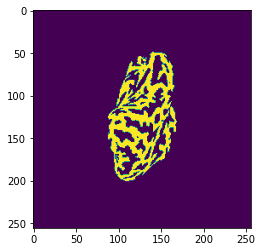

In [22]:
plt.imshow(x_np[:, :, 4])

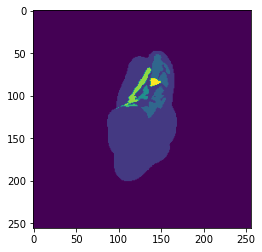

In [23]:
plt.imshow(y_np)

In [16]:
df_filtered

,Subject,Filename,Label,Mesh,Curv,Sulc,LabelName,LabelIndex
2,sub-107,lh.OTS.label,"[38655, 37523, 37522, 38654, 38656, 39797, 397...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",OTS,2
7,sub-107,lh.ptCoS.label,"[10249, 9468, 9467, 10248, 10268, 10229, 11063...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",ptCoS,4
8,sub-107,lh.mfs.label,"[44523, 43283, 43282, 44522, 43295, 44538, 432...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",mfs,3
13,sub-107,lh.CoS.label,"[56063, 54848, 54834, 56048, 56064, 56047, 560...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",CoS,5
28,sub-107,lh.atCoS.label,"[53543, 52292, 53542, 52313, 53563, 53527, 535...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",atCoS,6
...,...,...,...,...,...,...,...,...
2,sub-984,lh.OTS.label,"[55953, 55930, 55929, 55954, 57045, 57069, 570...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",OTS,2
7,sub-984,lh.ptCoS.label,"[16850, 16093, 16849, 16094, 16851, 17635, 176...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",ptCoS,4
8,sub-984,lh.mfs.label,"[33342, 33325, 32491, 33341, 33343, 34210, 342...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",mfs,3
13,sub-984,lh.CoS.label,"[23599, 22723, 23598, 22735, 23609, 23588, 245...","([[17.380359649658203, -132.06455993652344, -1...","[-0.03801928, -0.027469438, -0.06733044, -0.04...","[-6.0241985, -5.473342, -6.4759088, -6.0330677...",CoS,5


In [21]:
subject = 'sub-107'
df_filtered[df_filtered['Subject'] == subject]

,Subject,Filename,Label,Mesh,Curv,Sulc,LabelName,LabelIndex
2,sub-107,lh.OTS.label,"[38655, 37523, 37522, 38654, 38656, 39797, 397...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",OTS,2
7,sub-107,lh.ptCoS.label,"[10249, 9468, 9467, 10248, 10268, 10229, 11063...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",ptCoS,4
8,sub-107,lh.mfs.label,"[44523, 43283, 43282, 44522, 43295, 44538, 432...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",mfs,3
13,sub-107,lh.CoS.label,"[56063, 54848, 54834, 56048, 56064, 56047, 560...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",CoS,5
28,sub-107,lh.atCoS.label,"[53543, 52292, 53542, 52313, 53563, 53527, 535...","([[25.175575256347656, -128.15237426757812, -1...","[-0.29116353, -0.2955256, -0.28973848, -0.2910...","[-8.560373, -8.246529, -7.6527524, -8.578792, ...",atCoS,6


In [24]:
curv = df_filtered.iloc[0]['Curv']
curv = df_filtered.iloc[0]['Curv']
mesh = df_filtered.iloc[0]['Mesh']

In [32]:
mesh, stat, curv = get_subject_labels(subject, df_filtered)

In [29]:
mesh.coordinates.shape

(146410, 3)

In [34]:
view = plotting.view_surf(mesh, stat)

In [ ]:
view.save_as_html()

In [11]:
wd = '/scratch/groups/jyeatman/samjohns-projects/data/atlas-hbn'
ys = sorted(os.listdir(f'{wd}/ys'))
y = ys[0]
fn = f'{wd}/ys/{y}'

with open(fn, 'rb') as f:
    y_np = np.load(f)

In [12]:
y_np

array([[5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])

In [21]:
import numpy as np
import pandas as pd
import os
import sys

import unet.pipeline_utilities as pu
import matplotlib.pyplot as plt

start = 0
end = 1

hbn_dir = '/oak/stanford/groups/jyeatman/HBN/BIDS_curated/derivatives/freesurfer'
hbn_subjects = [s for s in os.listdir(hbn_dir) if s[:4]=='sub-']

save_base_dir = '/scratch/groups/jyeatman/samjohns-projects/data/atlas-hbn-test'
save_x_subdir = 'xs'
save_y_subdir = 'ys'
save_xdir = os.path.join(save_base_dir, save_x_subdir)
save_ydir = os.path.join(save_base_dir, save_y_subdir)

save_px2v_subdir = 'px2v'
save_pxcoord_subdir = 'pxcoord'
save_px2v_dir = os.path.join(save_base_dir, save_px2v_subdir)
save_pxcoord_dir = os.path.join(save_base_dir, save_pxcoord_subdir)

os.makedirs(save_base_dir, exist_ok=True)
os.makedirs(save_xdir, exist_ok=True)
os.makedirs(save_ydir, exist_ok=True)
os.makedirs(save_px2v_dir, exist_ok=True)
os.makedirs(save_pxcoord_dir, exist_ok=True)

parc_fn = 'lh.aparc.a2009s.annot'  # Destrieux parcellation
curv_fn = 'lh.curv'
mesh_fn = 'lh.inflated'

In [22]:
for sub in hbn_subjects[start:end]:
    
    subj_fp = os.path.join(hbn_dir, sub)
    subject_data_exists = pu.freesurfer_subject_data_exists_parc(subj_fp, [mesh_fn],
                                                                 [curv_fn],
                                                                 label_files=[parc_fn])
    if not subject_data_exists:  # skip subject if required files don't exist
        continue
    subject_data = pu.get_freesurfer_subject_with_parc(subj_fp,
                                                       [mesh_fn],
                                                       [curv_fn],
                                                       label_files=[parc_fn])

    mesh = subject_data[mesh_fn]
    curv = subject_data[curv_fn]
    parc = subject_data[parc_fn]

    # pipeline (below):
    # 1. create plt figures
    # 2. process (downsample, grayscale, extract channels) -> np array
    # 3. get px2v data from coordinate images
    
    nangles_inner = 1
    nangles_total = 1
    nangle_iterations = (nangles_total // nangles_inner) + 1

    for i in range(nangle_iterations):
        
        fig_dict = pu.make_subject_images(mesh, curv, parc, nangles=nangles_inner) 
        np_dict = pu.process_figs(fig_dict)
        np_px_dict = pu.px2v_from_np_dict(np_dict, 
                                          mesh_coords=mesh.coordinates)
        plt.close('all')  # clear all matplotlib plots to save memory
        pu.save_subject_npys(sub, np_px_dict, save_xdir, save_ydir, 
                             save_px2v_dir=save_px2v_dir, 
                             save_pxcoord_dir=save_pxcoord_dir)


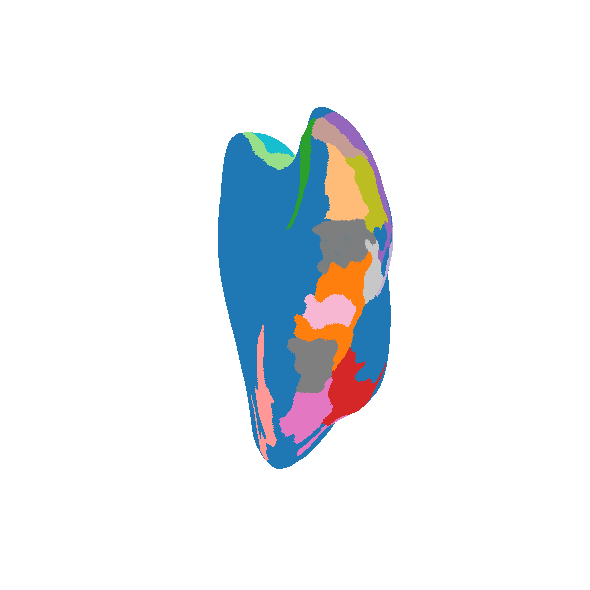

In [27]:
fig_dict['parc'][0]

{'angles': array([[206.34475702,  97.19616185]]),
 'mask': [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 'curv': [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)],
 'parc': [array([[5., 5., 5., ..., 5., 5., 5.],
         [5., 5., 5., ..., 5., 5., 5.],
         [5., 5., 5., ..., 5., 5., 5.],
         ...,
         [5., 5., 5., ..., 5., 5., 5.],
         [5., 5., 5., ..., 5., 5., 5.],
         [5., 5., 5., ..., 5., 5., 5.]])],
 'xcoord': [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..

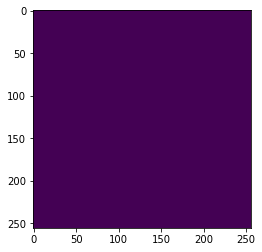

In [33]:
plt.imshow(np_dict['parc'][0])

In [35]:
def process_figs(img_dict, ns=256, mode=None, resample=None):
    """ Processes images in preparation for UNet.
        Several successive steps are applied.
        1. Downsampling
        2. Conversion to numpy
        3. Parsing colors to int channels from 0, 1, ... nchannels - 1
        Args:
            img_dict: (dict<list<fig>>) a dictionary of lists of
                matplotlib images; a subject from different angles. One key
                (angles) corresponds to the respective angles.
                keys: 'mask', 'curv', 'parc', 'xcoord', 'ycoord', 'zcoord'
                    'angles', and optionally other keys for other
                    stat_map channels.
                vals: lists of images of the corresponding modality. Each
                    list entry should be a different view of the same subject.
            ns: (int, optional) new pixel size of downsampled square image.
            mode: (string, optional - defaults to 'HBN') or else 'OTS', or else
                'OTS-MFS-GAP', specifying which image input is to be processed
                via process_parc_img.
            resample: (optional) PIL method to use for image downsampling
        Returns:
            npy_dict: dictionary with the same keys, each a list of the processed
                input plt figures. The figures are processed by downsampling,
                conversion to consistent channels, and conversion to npy arrays.
    """
    PROCESS_FUNCTIONS = {'mask': process_mask_img,
                         'curv': process_curv_img,
                         'parc': lambda img:
                         process_parc_img(img, resample=resample),
                         'xcoord': process_coord_img,
                         'ycoord': process_coord_img,
                         'zcoord': process_coord_img
                         }
    if mode == 'OTS':
        PROCESS_FUNCTIONS['parc'] = lambda img: \
            process_parc_img(img, pal=PAL_OTS, resample=resample)
    elif mode == 'OTS-MFS-GAP':
        PROCESS_FUNCTIONS['parc'] = lambda img: \
            process_parc_img(img, pal=PAL_OTS_MFS_GAP, resample=resample)
    elif mode == 'HBN-nonorm':
        PROCESS_FUNCTIONS['parc'] = lambda img: \
            process_parc_img(img, pal=PAL/255.0, resample=resample)
        
        
    DEFAULT_CHANNEL_FUNCTION = process_curv_img
    npy_dict = {}
    npy_dict['angles'] = img_dict['angles']
    nangles = len(img_dict['angles'])

    for key, val in img_dict.items():
        if key == 'angles':  # skip angles; no figures stored in this key
            continue
        if key in PROCESS_FUNCTIONS:
            fn = PROCESS_FUNCTIONS[key]
        else:
            
            fn = DEFAULT_CHANNEL_FUNCTION
        npy_dict[key] = [fn(fig_to_PIL(fig)) for fig in img_dict[key]]

    return npy_dict

In [40]:
test_parc_fig = fig_dict['parc'][0]
test_parc_pil = pu.fig_to_PIL(test_parc_fig)

In [63]:
test_parc_np1 = pu.process_parc_img(test_parc_pil, normalize=False)                    
test_parc_np2 = pu.process_parc_img(test_parc_pil, pal=pu.PAL/255)                    

In [64]:
np.equal(test_parc_np1, test_parc_np2).all()

True

In [58]:
np.unique(test_parc_np, return_counts=True)

(array([ 0.,  1.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 19.]),
 array([56105,  4987,   598,   427,   159,   133,   406,   260,   252,
           40,     7,   177,   390,   272,   828,   148,   267,    80]))

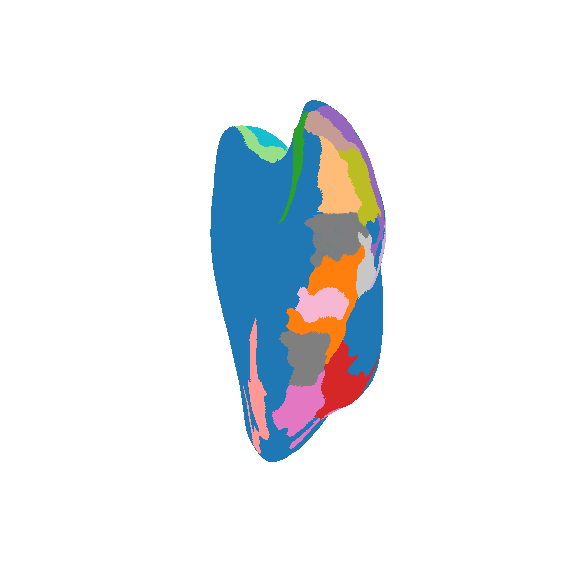

In [43]:
test_parc_pil

In [45]:
def process_parc_img(img, pal=None, img_out_fp=None, newsize=256, shifts=None,
                     resample=None, normalize=True):
    """ Downsamples an image, converts it to a numpy array,
        resamples each pixel color to nearest color
        in a specified palette (pal),
        and saves the result as a numpy array.
        Arguments:
            img: a PIL image
            pal: palette to resample to (np array of shape (nclrs, 3))
            img_out_fp: if None, output is not saved
            newsize: size to resize to (image should be square)
            resample: (optional) resampling algorithm to use during image
                resizing. Default (None) leads to PIL.Image.NEAREST. If
                reample='default', then the default PIL resampling method
                is used instead.
            normalize: (Boolean, default=True, or else float value). If False,
                no normalization will be performed. If True, normalization
                value will be inferred to be the maximum value of the image.
                If the value is manually provided, this is used instead.
        Returns:
            the resulting np array of shape (newsize, newsize,)
            with values in the range 0, pal.shape[0] - 1
    """
    if pal is None:
        palette = PAL
    elif pal == 'OTS':
        palette = PAL_OTS
    elif pal == 'OTS-MFS-GAP':
        palette = PAL_OTS_MFS_GAP
    else:
        palette = pal

    # downsampling logic
    if resample is None:
        resample = PIL.Image.NEAREST
    elif resample == 'default':
        resample = None

    img = img.resize((newsize, newsize), resample=resample)
    img = np.array(img)

    # parse normalize logic
    if isinstance(normalize, bool):
        if normalize:
            norm_value = np.max(img)
        else:
            norm_value = 1.0
    else:
        if not isinstance(normalize, float):
            raise TypeError
        norm_value = normalize
    img = img / norm_value
    img_channel = to_channel_img(img, pal=palette)

    if shifts is not None:
        img_channel = shift_single(img_channel, shifts=shifts)

    # save (optionally)
    if img_out_fp is not None:
        np.save(img_out_fp, img_channel)

    return img_channel

In [55]:
process_parc_img(test_parc_pil)

array([[255., 255., 255.],
       [ 31., 119., 180.],
       [174., 199., 232.],
       [255., 127.,  14.],
       [255., 187., 120.],
       [ 44., 160.,  44.],
       [152., 223., 138.],
       [214.,  39.,  40.],
       [255., 152., 150.],
       [148., 103., 189.],
       [197., 176., 213.],
       [140.,  86.,  75.],
       [196., 156., 148.],
       [227., 119., 194.],
       [247., 182., 210.],
       [127., 127., 127.],
       [199., 199., 199.],
       [188., 189.,  34.],
       [219., 219., 141.],
       [ 23., 190., 207.],
       [158., 218., 229.]])